# Objetivos

- Entender as relações entre as variáveis explicativas e entre as variáveis explicativas e a resposta.

# Pacotes e funções

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
%run /home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/99.Funcoes_auxiliares/Funcoes.py

# Leitura da base de treino

In [8]:
dados = pd.read_parquet('../1.Base_de_dados/treino.parquet')
dados.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
index,,,,,,,,
353955,5.689623,0.347200,1.105109,1,0,0,1,0
4582,58.380209,0.124193,0.334676,1,0,0,1,0
995260,21.729568,2.809812,0.352684,1,0,0,0,0
713182,49.862629,1.040213,0.943036,1,0,0,1,0
309053,13.585701,3.446598,1.715601,1,0,0,0,0


In [ ]:
# Volumetria dos dados
dados.shape

(783000, 8)

In [ ]:
# Avalia duplicidade dos dados
dados.duplicated().sum().sum()

np.int64(0)

In [ ]:
# Avalia tipagem dos dados e informação de nulidade de variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783000 entries, 353955 to 748258
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              783000 non-null  float64
 1   distance_from_last_transaction  783000 non-null  float64
 2   ratio_to_median_purchase_price  783000 non-null  float64
 3   repeat_retailer                 783000 non-null  int64  
 4   used_chip                       783000 non-null  int64  
 5   used_pin_number                 783000 non-null  int64  
 6   online_order                    783000 non-null  int64  
 7   fraud                           783000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 53.8 MB


## Estudo das variáveis categóricas

### Univariada

In [ ]:
# Somente 8,7% das transações são fraudulentas
conta_categorias(df = dados, variavel='fraud')[0], conta_categorias(df = dados, variavel='fraud')[1]

(   fraud   count
 0      0  714563
 1      1   68437,
    fraud      count
 0      0  91.259642
 1      1   8.740358)

In [ ]:
# 88% das transações ocorreram em lojas que já haviam sido visitadas anteriormente
conta_categorias(df = dados, variavel='repeat_retailer')[0], conta_categorias(df = dados, variavel='repeat_retailer')[1]

(   repeat_retailer   count
 1                0   93033
 0                1  689967,
    repeat_retailer      count
 1                0  11.881609
 0                1  88.118391)

In [ ]:
# 35% das transações ocorreram com o uso do chip do cartão de crédito
conta_categorias(df = dados, variavel='used_chip')[0], conta_categorias(df = dados, variavel='used_chip')[1]

(   used_chip   count
 0          0  508693
 1          1  274307,
    used_chip      count
 0          0  64.967178
 1          1  35.032822)

In [ ]:
# 10% das transações ocorreram com o uso do número do PIN
conta_categorias(df = dados, variavel='used_pin_number')[0], conta_categorias(df = dados, variavel='used_pin_number')[1]

(   used_pin_number   count
 0                0  704077
 1                1   78923,
    used_pin_number      count
 0                0  89.920434
 1                1  10.079566)

In [ ]:
# 65% das transações ocorreram em pedidos online
conta_categorias(df = dados, variavel='online_order')[0], conta_categorias(df = dados, variavel='online_order')[1]

(   online_order   count
 1             0  273582
 0             1  509418,
    online_order     count
 1             0  34.94023
 0             1  65.05977)

### Bivariada: explicativas e target

Busca-se avaliar a distribuição condicional das frequências/probabilidades em relação as variáveis categóricas, compará-las entre os níveis e em relação a distribuição de frequência geral (média da variável target na ausência de outras variáveis).

A probabilidade de ser fraude condicionada a compra ser do mesmo comerciante ou loja (ou de não ser do mesmo comerciante ou loja) é muito próxima da probabilidade ou distribuição de frequência da própria variável target. Ou seja, é provável que a variável repeat_retailer não traga tanto insumo no entendimento de uma transação ser ou não fraudulenta.

In [30]:
pd.crosstab(dados['repeat_retailer'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
repeat_retailer,,
0,0.911612,0.088388
1,0.912729,0.087271
All,0.912596,0.087404


In [33]:
pd.crosstab(dados['repeat_retailer'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
repeat_retailer,,,
0,84810,8223,93033
1,629753,60214,689967
All,714563,68437,783000


Diferente da variável anterior, consegue-se notar diferenças na distribuição condicionada das probabilidades da transação ser fraudulenta ou não. Agora, o uso do número PIN se mostra bem vantajoso (desconsiderando outras variáveis) quando se compara sem o uso do PIN e desconsiderando qualquer variável, ou seja, somente a distribuição de frequência da variável target.

É importante salientar que para esta variável, não só a distribuição percentual é baixa, como também a representatividade absoluta é bem baixa para as transações que são fraudulentas e que também usaram o número PIN. Veja a segunda tabela abaixo.

In [32]:
pd.crosstab(dados['used_pin_number'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
used_pin_number,,
0,0.903094,0.096906
1,0.997365,0.002635
All,0.912596,0.087404


In [34]:
pd.crosstab(dados['used_pin_number'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
used_pin_number,,,
0,635848,68229,704077
1,78715,208,78923
All,714563,68437,783000


A probabilidade da transação ser fraudulenta, condicionada que foi feita usando o chip, é menor comparada sem o uso do chip ($~3\%$ menor) e sem considerar a variável chip ($~2\%$ menor). Neste caso, veja que a quantidade absoluta de casos fraudulentos é considerável com e sem o uso do chip.

In [35]:
pd.crosstab(dados['used_chip'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
used_chip,,
0,0.900062,0.099938
1,0.935842,0.064158
All,0.912596,0.087404


In [36]:
pd.crosstab(dados['used_chip'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
used_chip,,,
0,457855,50838,508693
1,256708,17599,274307
All,714563,68437,783000


Na era digital em que vivemos, era de se esperar que a probabilidade de ser uma transação fraudulenta condicionada se o pedido foi online ou não fosse bem diferente. Note que, a probabilidade da transação ser fraudulenta é 12x maior quando o pedido foi feito online, comparado quando não foi feito online. Além disso, percebe-se diferença em relação a distribuição geral de fraudes, ou seja, a frequência de ser uma transação fraudulenta condicionada ao pedido online está 4 p.p. acima da média de fraudes.

In [37]:
pd.crosstab(dados['online_order'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
online_order,,
0,0.986505,0.013495
1,0.872904,0.127096
All,0.912596,0.087404


In [38]:
pd.crosstab(dados['online_order'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
online_order,,,
0,269890,3692,273582
1,444673,64745,509418
All,714563,68437,783000


### Bivariada: entre explicativas

Busca-se identificar alguma relação entre as variáveis categóricas, identificando alguma concentração em níveis das variáveis explicativas. Aparentemente, nenhuma diferença foi observada.

In [51]:
colunas = ['repeat_retailer', 'used_pin_number', 'used_chip', 'online_order']

for i in range(0,len(colunas)):
    for j in range(i+1,len(colunas)):
        print(colunas[i], '+', colunas[j])
        print(pd.crosstab(dados[colunas[i]], dados[colunas[j]], normalize='index', margins=True))
        print('\n')
        print('====================================')
        print('\n')

repeat_retailer + used_pin_number
used_pin_number         0         1
repeat_retailer                    
0                0.898778  0.101222
1                0.899262  0.100738
All              0.899204  0.100796




repeat_retailer + used_chip
used_chip               0         1
repeat_retailer                    
0                0.646265  0.353735
1                0.650131  0.349869
All              0.649672  0.350328




repeat_retailer + online_order
online_order            0         1
repeat_retailer                    
0                0.349274  0.650726
1                0.349420  0.650580
All              0.349402  0.650598




used_pin_number + used_chip
used_chip               0         1
used_pin_number                    
0                0.649378  0.350622
1                0.652294  0.347706
All              0.649672  0.350328




used_pin_number + online_order
online_order            0         1
used_pin_number                    
0                0.349433  0.650567
1   

## Estudo das variáveis numéricas

- 50% das transações estão entre 3.8 a 25.7 unidades de medida, distantes de casa;
- 50% das transações estão entre 0.29 a 3.35 unidades de medida, da última transação e 
- 50% das transações estão entre 0.48 a 2.1 vezes a mediana de compra dos clientes.

In [66]:
dados[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,783000.000000,783000.000000,783000.000000
mean,26.533938,5.024006,1.824391
std,64.342181,26.771080,2.787147
min,0.004874,0.000118,0.004399
25%,3.877454,0.296673,0.475770
50%,9.963822,0.999645,0.998162
75%,25.734682,3.358644,2.098965
max,10632.723672,11851.104565,266.689692


### Univariada

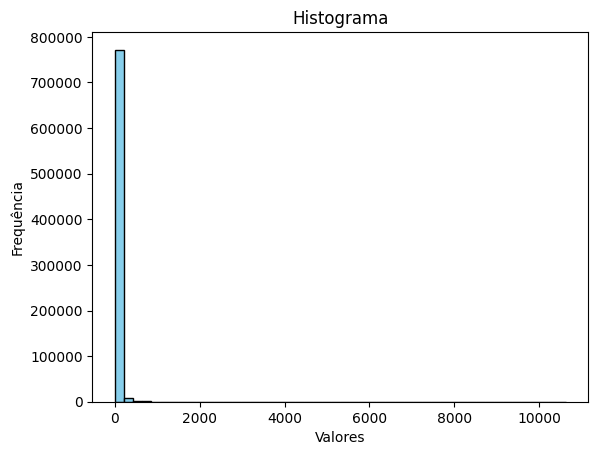

In [ ]:
# Muita concentração em distâncias até 1000 unidades de medida
plot_histograma(df=dados, variavel='distance_from_home', bins=50)      

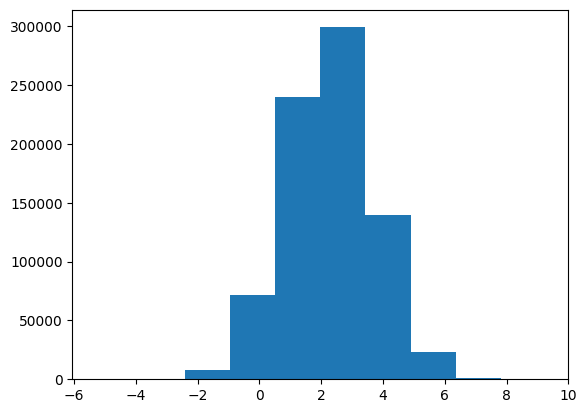

In [68]:
plt.hist(np.log(dados['distance_from_home']))
plt.show()

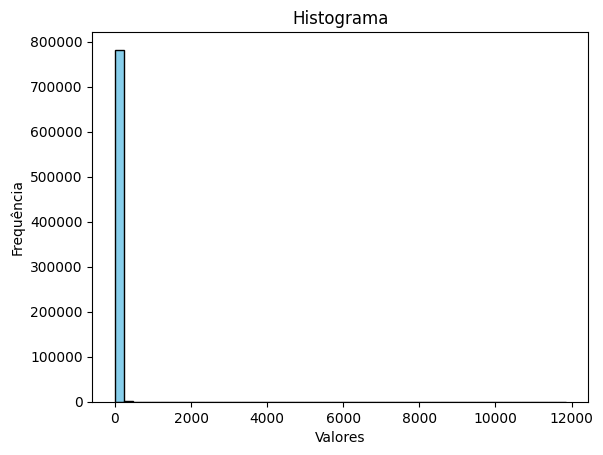

In [ ]:
# Muita concentração em distâncias até 1000 unidades de medida
plot_histograma(df=dados, variavel='distance_from_last_transaction', bins=50)

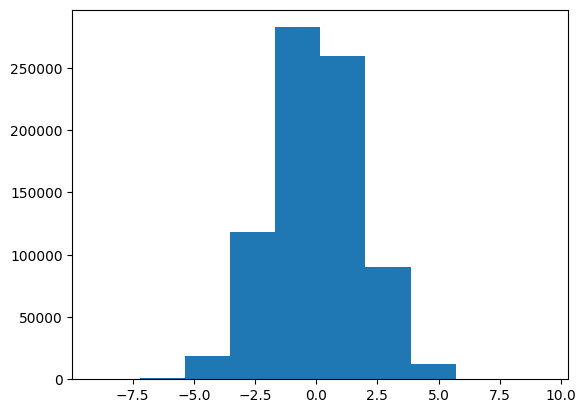

In [69]:
plt.hist(np.log(dados['distance_from_last_transaction']))
plt.show()

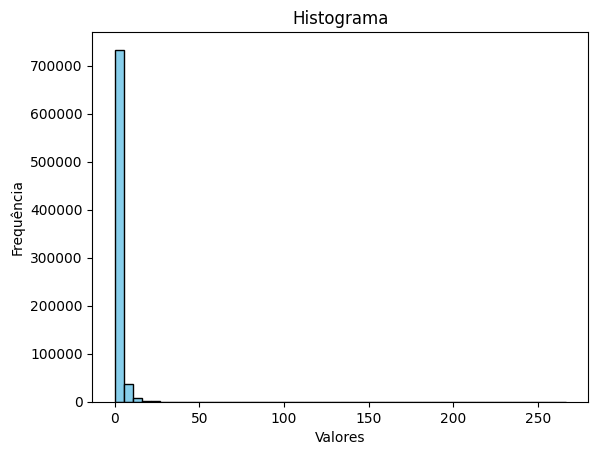

In [ ]:
# Muita concentração em valores até 25 vezes a mediana de compras
plot_histograma(df=dados, variavel='ratio_to_median_purchase_price', bins=50)

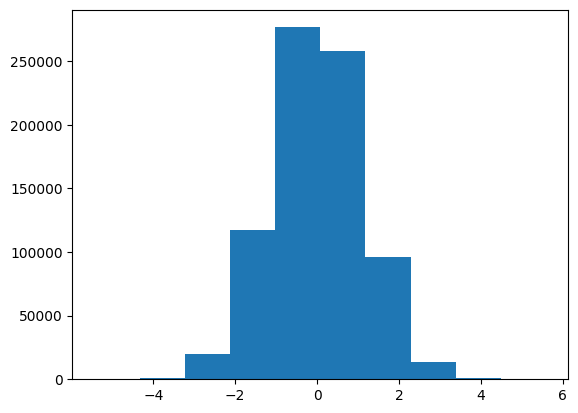

In [70]:
plt.hist(np.log(dados['ratio_to_median_purchase_price']))
plt.show()

### Construção das variáveis numéricas na escala logarítmica

In [72]:
dados['log_distance_from_home'] = np.log(dados['distance_from_home'])
dados['log_distance_from_last_transaction'] = np.log(dados['distance_from_last_transaction'])
dados['log_ratio_to_median_purchase_price'] = np.log(dados['ratio_to_median_purchase_price'])